# 边缘检测-Wallis微分算子

In [1]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [3]:
def edge_wallis(src):
    rows,cols = src.shape
    srcf = src.astype(np.float32) / 255.0
    I = srcf
    II = np.zeros_like(srcf)
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            II[i,j]=np.log10(I[i,j]+1) - \
                    0.25*(np.log10(I[i-1,j]+1) + \
                    np.log10(I[i+1,j]+1)+ \
                    np.log10(I[i,j-1]+1)+ \
                    np.log10(I[i,j+1]+1))
    min1 = np.amin(II)
    min2 = np.amin(min1)
    II = 46 * II - min2 + 0.4
    
    idx = (II < -0.035)
    II[idx] = 0
    II[~idx] = 1
    II = II * 255
    II = II.astype(np.uint8)
    return II

In [4]:
dst = edge_wallis(gray)

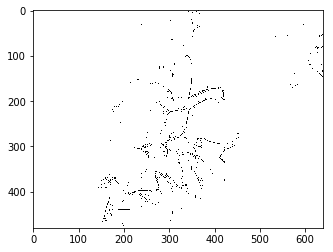

In [5]:
plt.imshow(dst,'gray')

参考：

[1]. https://blog.csdn.net/sunboyiris/article/category/1699683/2